In [1]:
!pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score,accuracy_score,precision_score

In [3]:
train = pd.read_csv('train.csv')
train.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,48,meale,1,2,1,1,2,2,1,2,1,1,1,4.80,123,157,2.7,31,2,DIE
1,51,Male,2,2,1,2,2,2,1,1,1,2,1,1.00,?,20,3.0,63,2,LIVE
2,40,m,1,2,1,2,2,2,1,2,2,2,2,0.60,62,166,4.0,63,1,LIVE
3,25,m,2,2,1,2,2,1,1,1,1,1,1,1.30,181,181,4.5,57,2,LIVE
4,34,M,1,2,1,2,2,1,1,2,1,2,2,1.00,72,46,4.4,57,1,LIVE


In [4]:
test = pd.read_csv('test_no_class.csv')
test.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,39,Male,2,2,1,2,2,2,1,2,2,2,2,0.70,?,48,4.4,?,1
1,41,Feamle,2,1,1,1,1,2,2,2,2,2,2,0.70,81,53,5.0,74,1
2,28,maled,1,2,1,1,1,2,1,2,2,2,2,1.60,44,123,4.0,46,1
3,36,maled,1,2,1,1,1,2,1,2,2,2,2,1.00,?,45,4.0,57,1
4,32,M,2,2,2,2,2,2,2,2,2,2,2,0.70,102,64,4.0,90,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AGE              102 non-null    int64 
 1   SEX              102 non-null    object
 2   STEROID          102 non-null    object
 3   ANTIVIRALS       102 non-null    int64 
 4   FATIGUE          102 non-null    int64 
 5   MALAISE          102 non-null    int64 
 6   ANOREXIA         102 non-null    int64 
 7   LIVER BIG        102 non-null    object
 8   LIVER FIRM       102 non-null    object
 9   SPLEEN PALPABLE  102 non-null    object
 10  SPIDERS          102 non-null    object
 11  ASCITES          102 non-null    object
 12  VARICES          102 non-null    object
 13  BILIRUBIN        102 non-null    object
 14  ALK PHOSPHATE    102 non-null    object
 15  SGOT             102 non-null    object
 16  ALBUMIN          102 non-null    object
 17  PROTIME          102 non-null    ob

## data cleaning

In [6]:
# change all column names into a lower case and replace ' ' with '_'

In [7]:
def clean_colname(df):
    cols = []
    for colname in df.columns:
        cols.append(colname.replace(' ','_').lower())
    df.columns = cols
    return df

In [8]:
train = clean_colname(train)
train.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,48,meale,1,2,1,1,2,2,1,2,1,1,1,4.80,123,157,2.7,31,2,DIE
1,51,Male,2,2,1,2,2,2,1,1,1,2,1,1.00,?,20,3.0,63,2,LIVE
2,40,m,1,2,1,2,2,2,1,2,2,2,2,0.60,62,166,4.0,63,1,LIVE
3,25,m,2,2,1,2,2,1,1,1,1,1,1,1.30,181,181,4.5,57,2,LIVE
4,34,M,1,2,1,2,2,1,1,2,1,2,2,1.00,72,46,4.4,57,1,LIVE


In [9]:
#apply function to test
test = clean_colname(test)
test.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,39,Male,2,2,1,2,2,2,1,2,2,2,2,0.70,?,48,4.4,?,1
1,41,Feamle,2,1,1,1,1,2,2,2,2,2,2,0.70,81,53,5.0,74,1
2,28,maled,1,2,1,1,1,2,1,2,2,2,2,1.60,44,123,4.0,46,1
3,36,maled,1,2,1,1,1,2,1,2,2,2,2,1.00,?,45,4.0,57,1
4,32,M,2,2,2,2,2,2,2,2,2,2,2,0.70,102,64,4.0,90,1


In [10]:
train['sex'].value_counts(dropna=False)

m         20
meale     18
Male      15
M         13
maled     13
male      13
F          4
Feamle     4
female     2
Name: sex, dtype: int64

In [11]:
#clean sex column
def clean_sex(x):
    if x in ['m','meale','Male','M','maled','male']:
        return '1'
    else:
        return '0'

In [12]:
train['sex'] = train['sex'].apply(clean_sex)

In [13]:
train['sex'].value_counts(dropna=False)

1    92
0    10
Name: sex, dtype: int64

In [14]:
#apply function to test
test['sex'] = test['sex'].apply(clean_sex)
test['sex'].value_counts(dropna=False)

1    47
0     6
Name: sex, dtype: int64

In [15]:
#since i see '?' in alk_phosphate columns,maybe there are '?" in other columns, so i just replace in the train.
train.replace('?',np.NaN,inplace = True) 

In [16]:
#do the same to test
test.replace('?',np.NaN,inplace = True) 

In [17]:
for col in train.columns:
    print(col, train[col].nunique())

print()

age 42
sex 2
steroid 2
antivirals 2
fatigue 2
malaise 2
anorexia 2
liver_big 2
liver_firm 2
spleen_palpable 2
spiders 2
ascites 2
varices 2
bilirubin 27
alk_phosphate 58
sgot 64
albumin 27
protime 35
histology 2
class 2



In [18]:
for col in test.columns:
    print(col, test[col].nunique())

print()

age 32
sex 2
steroid 2
antivirals 2
fatigue 2
malaise 2
anorexia 2
liver_big 2
liver_firm 2
spleen_palpable 2
spiders 2
ascites 2
varices 2
bilirubin 20
alk_phosphate 35
sgot 42
albumin 21
protime 22
histology 2



In [19]:
train.dtypes

age                 int64
sex                object
steroid            object
antivirals          int64
fatigue             int64
malaise             int64
anorexia            int64
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
class              object
dtype: object

In [20]:
#correct types of columns
#since there are NaN in many columns, i can't correct types to int.
train = train.astype({'sex':'int64','steroid':'float','liver_big':'float','liver_firm':'float','spleen_palpable':'float',
                      'spiders':'float','ascites':'float','varices':'float','bilirubin':'float','alk_phosphate':'float',
                      'sgot':'float','albumin':'float','protime':'float'})

In [21]:
train.dtypes

age                  int64
sex                  int64
steroid            float64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big          float64
liver_firm         float64
spleen_palpable    float64
spiders            float64
ascites            float64
varices            float64
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology            int64
class               object
dtype: object

In [22]:
test.dtypes

age                 int64
sex                object
steroid             int64
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [23]:
test = test.astype({'sex':'int64','steroid':'float','liver_big':'float','liver_firm':'float','spleen_palpable':'float',
                      'spiders':'float','ascites':'float','varices':'float','bilirubin':'float','alk_phosphate':'float',
                      'sgot':'float','albumin':'float','protime':'float'})

In [24]:
test.dtypes

age                  int64
sex                  int64
steroid            float64
antivirals           int64
fatigue             object
malaise             object
anorexia            object
liver_big          float64
liver_firm         float64
spleen_palpable    float64
spiders            float64
ascites            float64
varices            float64
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology            int64
dtype: object

### check the missing value

In [25]:
train.isna().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             0
malaise             0
anorexia            0
liver_big           6
liver_firm          7
spleen_palpable     3
spiders             3
ascites             3
varices             3
bilirubin           3
alk_phosphate      18
sgot                3
albumin             9
protime            47
histology           0
class               0
dtype: int64

In [26]:
test.isna().sum()

age                 0
sex                 0
steroid             0
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big           4
liver_firm          4
spleen_palpable     2
spiders             2
ascites             2
varices             2
bilirubin           3
alk_phosphate      11
sgot                1
albumin             7
protime            20
histology           0
dtype: int64

In [27]:
#deal with missing value

In [28]:
def clean_null_cat(df, cols):
    for col in cols:
        m = df[df[col].notna()][col].mode()[0]
        print(m)
        df[col] = df[col].fillna(m)
        print(df[col].isna().sum())
    return df

In [29]:
train = clean_null_cat(train, ['steroid','liver_big','liver_firm','spleen_palpable','spiders','ascites','varices'])

2.0
0
2.0
0
2.0
0
2.0
0
2.0
0
2.0
0
2.0
0


In [30]:
test = clean_null_cat(test, ['fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palpable','spiders','ascites','varices'])

1
0
2
0
2
0
2.0
0
2.0
0
2.0
0
2.0
0
2.0
0
2.0
0


In [31]:
def clean_null_num(df, cols):
    for col in cols:
        median = round(df[df[col].notna()][col].median(),2)
        print(median)
        df[col] = df[col].fillna(median)
        print(df[col].isna().sum())
    return df

In [32]:
train = clean_null_num(train, ['bilirubin','alk_phosphate','sgot','albumin','protime'])

1.0
0
85.0
0
55.0
0
4.0
0
62.0
0


In [33]:
test = clean_null_num(test, ['bilirubin','alk_phosphate','sgot','albumin','protime'])

1.0
0
85.0
0
60.0
0
4.0
0
60.0
0


In [34]:
train.isna().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

In [35]:
test.isna().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

In [36]:
#after cleaning missing value, i will correct some columns types to int
train = train.astype({'sex':'int','steroid':'int','liver_big':'int','liver_firm':'int','spleen_palpable':'int',
                      'spiders':'int','ascites':'int','varices':'int','bilirubin':'float','alk_phosphate':'int',
                      'sgot':'int','albumin':'float','protime':'int'})

test = test.astype({'sex':'int','steroid':'int','liver_big':'int','liver_firm':'int','spleen_palpable':'int',
                      'spiders':'int','ascites':'int','varices':'int','bilirubin':'float','alk_phosphate':'int',
                      'sgot':'int','albumin':'float','protime':'int'})

In [37]:
train.shape

(102, 20)

In [38]:
test.shape

(53, 19)

In [39]:
train['class'].value_counts(dropna=False)

LIVE    81
DIE     21
Name: class, dtype: int64

## EDA

In [40]:
train.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,48,1,1,2,1,1,2,2,1,2,1,1,1,4.8,123,157,2.7,31,2,DIE
1,51,1,2,2,1,2,2,2,1,1,1,2,1,1.0,85,20,3.0,63,2,LIVE
2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.6,62,166,4.0,63,1,LIVE
3,25,1,2,2,1,2,2,1,1,1,1,1,1,1.3,181,181,4.5,57,2,LIVE
4,34,1,1,2,1,2,2,1,1,2,1,2,2,1.0,72,46,4.4,57,1,LIVE


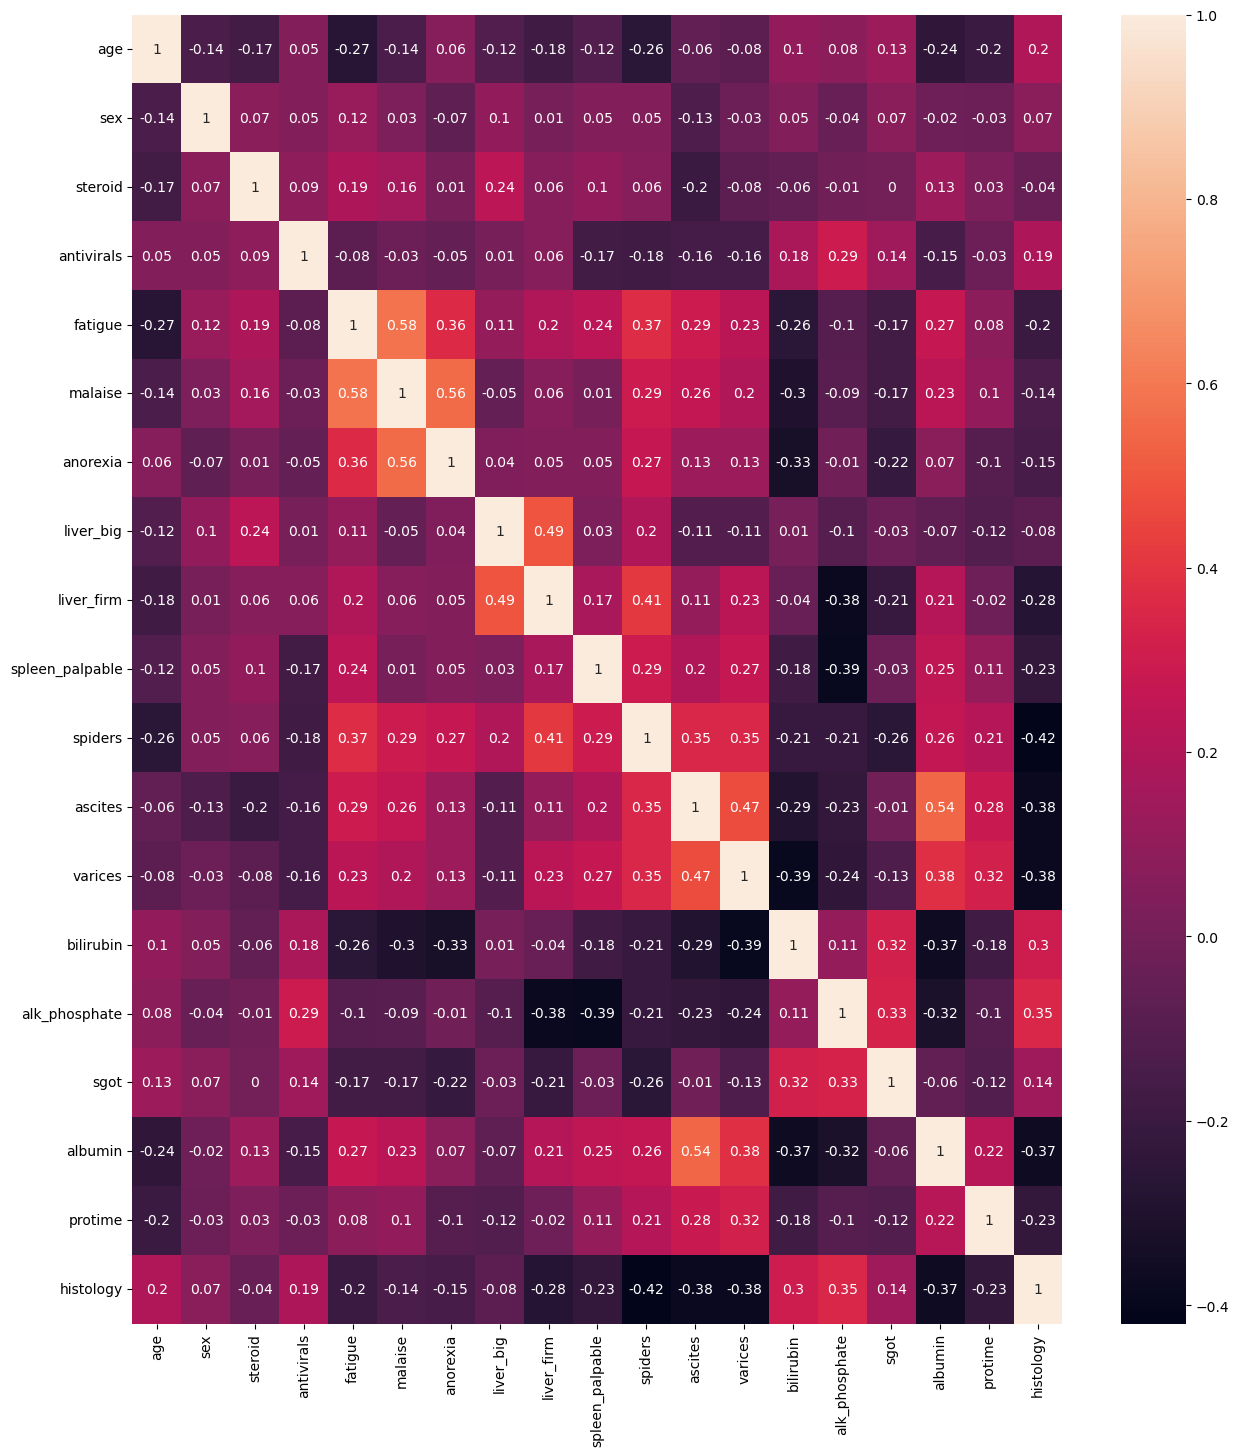

In [41]:
fig, ax = plt.subplots(figsize=(15, 17))
sns.heatmap(round(train.corr(),2),annot=True)
plt.show()

### upsampling

In [42]:
y = train['class']
X = train.drop(['class','alk_phosphate','protime'],axis=1)

In [43]:
majority_indexes = y[y == 'LIVE'].index
minority_indexes = y[y == 'DIE'].index

In [44]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [45]:
ros = RandomOverSampler(random_state=42)

X_over, y_over = ros.fit_resample(X, y)
train_over = pd.concat([X_over,y_over],axis=1)
print('Resampled dataset shape %s' % Counter(y_over))
print(y_over.value_counts())
train_over

Resampled dataset shape Counter({'DIE': 81, 'LIVE': 81})
DIE     81
LIVE    81
Name: class, dtype: int64


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,sgot,albumin,histology,class
0,48,1,1,2,1,1,2,2,1,2,1,1,1,4.8,157,2.7,2,DIE
1,51,1,2,2,1,2,2,2,1,1,1,2,1,1.0,20,3.0,2,LIVE
2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.6,166,4.0,1,LIVE
3,25,1,2,2,1,2,2,1,1,1,1,1,1,1.3,181,4.5,2,LIVE
4,34,1,1,2,1,2,2,1,1,2,1,2,2,1.0,46,4.4,1,LIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,45,1,2,2,1,1,1,2,2,2,1,1,2,1.9,114,2.4,2,DIE
158,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,242,3.3,2,DIE
159,59,1,1,2,1,1,2,2,1,1,1,2,2,1.5,157,3.6,2,DIE
160,30,1,2,2,1,1,1,2,1,2,1,1,1,2.5,64,2.8,2,DIE


### scaling

In [46]:
numerical = train_over.select_dtypes(np.number)
categorical = train_over.select_dtypes(np.object)

In [47]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler()
transformer.fit(numerical)
num_normalized = transformer.transform(numerical)
num_normalized= pd.DataFrame(num_normalized, columns=numerical.columns)
num_normalized

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,sgot,albumin,histology
0,0.661290,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.584416,0.541667,0.18750,1.0
1,0.709677,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.090909,0.022727,0.28125,1.0
2,0.532258,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.038961,0.575758,0.59375,0.0
3,0.290323,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.129870,0.632576,0.75000,1.0
4,0.435484,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.090909,0.121212,0.71875,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.612903,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.207792,0.378788,0.09375,1.0
158,0.629032,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.948052,0.863636,0.37500,1.0
159,0.838710,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.155844,0.541667,0.46875,1.0
160,0.370968,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.285714,0.189394,0.21875,1.0


In [48]:
train_scaled= pd.concat([num_normalized, categorical], axis = 1)
train_scaled

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,sgot,albumin,histology,class
0,0.661290,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.584416,0.541667,0.18750,1.0,DIE
1,0.709677,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.090909,0.022727,0.28125,1.0,LIVE
2,0.532258,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.038961,0.575758,0.59375,0.0,LIVE
3,0.290323,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.129870,0.632576,0.75000,1.0,LIVE
4,0.435484,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.090909,0.121212,0.71875,0.0,LIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.612903,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.207792,0.378788,0.09375,1.0,DIE
158,0.629032,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.948052,0.863636,0.37500,1.0,DIE
159,0.838710,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.155844,0.541667,0.46875,1.0,DIE
160,0.370968,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.285714,0.189394,0.21875,1.0,DIE


In [49]:
train_scaled.shape

(162, 18)

### train_test_split

In [51]:
X_scaled = train_scaled.drop(['class'],axis=1)
y_scaled = train_scaled['class']
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_scaled,test_size =0.2, random_state=25)

### modeling - logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() 
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("The kappa in the train set is: {:.2f}".format(cohen_kappa_score(y_train,y_pred_train)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The kappa in the train set is: 0.69
The Kappa in the TEST set is: 0.76


In [53]:
### refit our model in the whole train without splitting
x_test = test.drop(['alk_phosphate','protime'],axis=1)

In [54]:
transformer = MinMaxScaler()
transformer.fit(x_test)
test_normalized = transformer.transform(x_test)
test_normalized= pd.DataFrame(test_normalized, columns=x_test.columns)
test_normalized.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,sgot,albumin,histology
0,0.327586,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.071429,0.053628,0.473684,0.0
1,0.362069,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.071429,0.061514,0.631579,0.0
2,0.137931,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.285714,0.171924,0.368421,0.0
3,0.275862,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.142857,0.048896,0.368421,0.0
4,0.206897,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.071429,0.078864,0.368421,0.0


In [55]:
model_lr = LogisticRegression() 
model_lr.fit(X_scaled, y_scaled)
y_pred = model_lr.predict(test_normalized)

In [58]:
y_pred = pd.DataFrame(y_pred, columns=['Class'])
y_pred['Class'].value_counts()

LIVE    34
DIE     19
Name: Class, dtype: int64

In [59]:
y_pred.to_csv('group_1_lr.csv',index=False)

In [60]:
y_pred

,Class
0,LIVE
1,LIVE
2,DIE
3,LIVE
4,LIVE
5,LIVE
6,LIVE
7,LIVE
8,DIE
9,LIVE


### KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [63]:
print("The kappa in the train set is: {:.2f}".format(cohen_kappa_score(y_train,y_pred_train)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The kappa in the train set is: 0.91
The Kappa in the TEST set is: 0.70


In [64]:
model_knn = KNeighborsClassifier(n_neighbors = 3)
model_knn.fit(X_scaled, y_scaled)
y_pred = model_knn.predict(test_normalized)

In [65]:
y_pred = pd.DataFrame(y_pred, columns=['Class'])
y_pred['Class'].value_counts()

LIVE    37
DIE     16
Name: Class, dtype: int64

In [ ]:
#y_pred.to_csv('group_1_lr.csv',index=False)